In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt

## Number 1

Download Housing Start Data from FRED 

In [5]:
start = datetime.datetime (1960, 1, 1)
end = datetime.datetime (2021, 12, 31)

housing = pdr.DataReader(['HOUSTNSA'], 'fred', start, end)
housing.head()

,HOUSTNSA
DATE,
1960-01-01,86.0
1960-02-01,90.7
1960-03-01,90.5
1960-04-01,123.0
1960-05-01,130.2


Construct Dummy Variables for the Four Seasons 

In [ ]:
winter = #Dec Jan Feb
spring =  #March April May
summer =  #June July Aug
fall =  #Sept Oct Nov

Regress the Housing Starts on these dummy variables

Estimated Coefficients from Regression 

Plot actual data with smoother seasonally adjusted series from regression

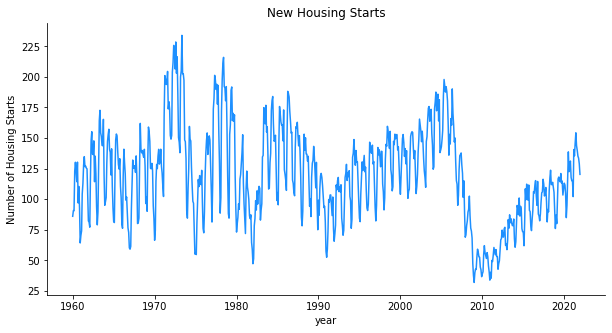

In [10]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(housing.index, housing['HOUSTNSA'],color = 'dodgerblue')


ax.set_title('New Housing Starts')
ax.set_ylabel('Number of Housing Starts')
ax.set_xlabel('year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Number 3

Use inflation rate data from Team Assignment 1

In [22]:
start = datetime.datetime (1950, 1, 1)
end = datetime.datetime (2022, 1, 1)

fred = pdr.DataReader(['CPIAUCSL'], 'fred', start, end)

In [23]:
fred = fred.rename(columns = {'CPIAUCSL':'CPI'})

In [24]:
fred['CPI Log'] = fred.apply(np.log)

In [25]:
fred['CPI Log Diff'] = fred['CPI Log'].diff(1)

In [26]:
fred['Inflation Rate'] = fred['CPI Log Diff']*100*12

In [27]:
fred.head()

,CPI,CPI Log,CPI Log Diff,Inflation Rate
DATE,,,,
1950-01-01,23.51,3.157426,NaN,NaN
1950-02-01,23.61,3.161670,0.004244,5.093386
1950-03-01,23.64,3.162940,0.001270,1.523810
1950-04-01,23.65,3.163363,0.000423,0.507507
1950-05-01,23.77,3.168424,0.005061,6.073400


Make Inflation Rate an Array

In [39]:
inflationrate = fred['Inflation Rate'].array
inflationrate

<PandasArray>
[               nan,  5.093386254531751, 1.5238097285713792,
 0.5075068800531213,  6.073399720992789,  5.540408582758616,
  9.509955924695213, 6.4636576411922775,  6.922145276088543,
  7.862435989560268,
 ...
  7.418851785535807,  9.205029853319502,  7.705911800005083,
 10.809441209795168,  5.672578791992322, 3.2878722585913067,
  4.939054765586448, 11.266788402062033,   9.31315464295217,
 5.6322008263588685]
Length: 864, dtype: float64

Plot first 24 Autocorrelations for time period

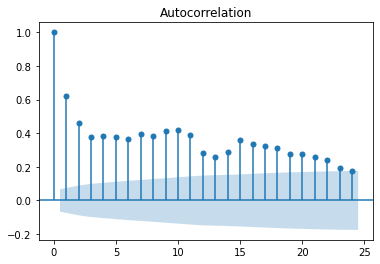

In [45]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(inflationrate[1:], lags=24)
pyplot.show()

In [74]:
import statsmodels.api as sm

#calculate autocorrelations
ac = sm.tsa.acf(inflationrate[1:], nlags=12)
ac

array([1.        , 0.6188916 , 0.46174879, 0.37886824, 0.38585842,
       0.37746582, 0.36687248, 0.39208256, 0.38254522, 0.4107228 ,
       0.41737522, 0.39165186, 0.27936467])

In [80]:
from statistics import stdev
#calculate t statistic
tstat = ac.mean()/(stdev(ac)/(len(ac)**.5))
tstat

8.957448113108885

In [53]:
#autocovariances
sm.tsa.stattools.acovf(inflationrate[1:], nlag=24)

array([14.70872491,  9.10310636,  6.79173596,  5.57266877,  5.67548533,
        5.55204098,  5.3962264 ,  5.76703452,  5.62675238,  6.04120863,
        6.13905725,  5.76069946,  4.10909808,  3.76329488,  4.21203238,
        5.2749486 ,  4.92353722,  4.78728209,  4.61604646,  4.06761605,
        4.03025207,  3.84195553,  3.56750095,  2.85371075,  2.5528744 ])

The autocorrelation graph does not show signs of white noise.  The autocorrelations seem to be dependent on the other data. 

In [76]:
from statsmodels.stats.stattools import durbin_watson

In [77]:
durbin_watson(ac)

0.06311315235100923

In [81]:
from statsmodels.tsa.stattools import adfuller

adfuller(ac)

(-1.0317583967277086,
 0.7415056798611757,
 1,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 -27.52859667919877)